In [1]:
import pandas as pd

In [8]:
df = pd.read_excel('Presences_Absences_Train.xlsx')

In [9]:
df

,glcID,gbifID,observer,datasetName,date,dayOfYear,year,lon,lat,x_EPSG3035,y_EPSG3035,geoUncertaintyInM,speciesId,patchID,timeSerieID
0,5140269,3.473385e+09,(IGN),Inventaire forestier IGN,2018-01-31 00:00:00,31,2018,7.300790,48.29273,4.120673e+06,2.801353e+06,1.0,6574,3018575,3980325
1,5279421,3.474159e+09,(IGN),Inventaire forestier IGN,2017-07-19 00:00:00,200,2017,1.483390,42.92599,3.625340e+06,2.241565e+06,1.0,6574,3011783,3980331
2,5058088,3.475680e+09,(IGN),Inventaire forestier IGN,2017-09-26 00:00:00,269,2017,6.739570,47.39633,4.074778e+06,2.703502e+06,1.0,6574,3018192,3980335
3,5146840,3.476162e+09,(IGN),Inventaire forestier IGN,2017-09-20 00:00:00,263,2017,4.587140,45.40615,3.897015e+06,2.492494e+06,1.0,6574,3015541,3980336
4,5255062,3.475124e+09,(IGN),Inventaire forestier IGN,2019-09-18 00:00:00,261,2019,6.955830,47.74829,4.092660e+06,2.741886e+06,1.0,6574,3018391,3980351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85320,5320539,NaN,NaN,CBNMed,1621461600,140,2021,5.094570,44.18660,3.928254e+06,2.354689e+06,10.0,9456,76900,3993145
85321,5392608,NaN,NaN,CBNMed,1497909600,171,2017,5.781197,43.74345,3.980545e+06,2.302273e+06,10.0,9456,94452,3986894
85322,5353058,NaN,NaN,CBNMed,1621461600,140,2021,5.094620,44.18680,3.928259e+06,2.354711e+06,10.0,9456,76905,3993923
85323,5102872,2.907311e+09,"Shoesmith, J. Judith",Nat. plant monitoring UK,2017-06-07 00:00:00,158,2017,0.785642,51.70740,3.686016e+06,3.217623e+06,7.1,6081,3010687,3990777


In [6]:
pip install geopandas


     ---------------------------------------- 1.1/1.1 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 22.7/22.7 MB 3.4 MB/s eta 0:00:00


In [7]:
import geopandas as gpd

In [11]:
geoDF = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.lat, df.lon))

In [18]:
pip install contextily

     ---------------------------------------- 56.7/56.7 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 22.9/22.9 MB 3.2 MB/s eta 0:00:00
     -------------------------------------- 125.4/125.4 kB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
import contextily as cx

CRSError: The WKT could not be parsed. OGR Error code 5

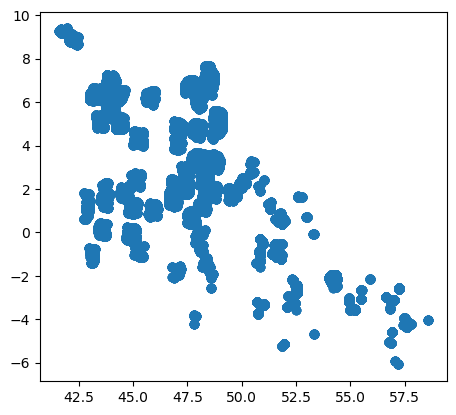

In [20]:
ax = geoDF.plot()
cx.add_basemap(ax, crs='EPSG3035')

In [21]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_17196\4025383553.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_filepath = gpd.datasets.get_path('naturalearth_lowres')


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [25]:
maps = gpd.read_file("countries.geojson")
maps

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."
...,...,...,...
250,Samoa,WSM,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564..."
251,Yemen,YEM,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12..."
252,South Africa,ZAF,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -..."
253,Zambia,ZMB,"POLYGON ((31.11984 -8.61663, 31.14102 -8.60619..."


In [44]:
fr_br = maps.loc[maps['ISO_A3'].isin(['FRA','GBR'])]
fr_br

,ADMIN,ISO_A3,geometry
77,France,FRA,"MULTIPOLYGON (((55.50131 -20.87322, 55.51401 -..."
81,United Kingdom,GBR,"MULTIPOLYGON (((-6.28751 49.91401, -6.29727 49..."


<Axes: >

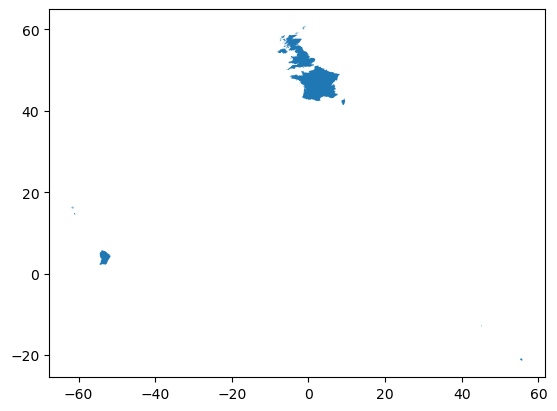

In [45]:
fr_br.plot()